In [1]:
#Importing necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
#Reading the dataset
data=pd.read_csv("train-chennai-sale.csv")
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [3]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [4]:
#Dropping all the columns which have null values
data.dropna(inplace=True)

In [5]:
data["AREA"].value_counts()

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
Chormpet         5
TNagar           5
Karapakam        3
Ana Nagar        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [6]:
#Treating duplicates
data["AREA"]=data["AREA"].replace({"Chrompt":"Chrompet","Chormpet":"Chrompet","Chrmpet":"Chrompet","TNagar":"T Nagar","Ana Nagar":"Anna Nagar","Karapakam":"Karapakkam","Ann Nagar":"Anna Nagar","Velchery":"Velachery","Adyr":"Adyar","KKNagar":"KK Nagar"})

In [7]:
data["SALE_COND"].value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [8]:
data["SALE_COND"]=data["SALE_COND"].replace({"Adj Land":"AdjLand","Ab Normal":"AbNormal","Partiall":"Partial","PartiaLl":"Partial"})

In [9]:
data["PARK_FACIL"].value_counts()

Yes    3557
No     3498
Noo       1
Name: PARK_FACIL, dtype: int64

In [10]:
data["PARK_FACIL"]=data["PARK_FACIL"].replace({"Noo":"No"})

In [11]:
data["BUILDTYPE"].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

In [12]:
data["BUILDTYPE"]=data["BUILDTYPE"].replace({"Other":"Others","Comercial":"Commercial"})

In [13]:
data["UTILITY_AVAIL"].value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [14]:
data["UTILITY_AVAIL"]=data["UTILITY_AVAIL"].replace({"All Pub":"AllPub","NoSewr":"NoSeWa"})

In [15]:
data["STREET"].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [16]:
data["STREET"]=data["STREET"].replace({"Pavd":"Paved","NoAccess":"No Access"})

In [17]:
data["MZZONE"].value_counts()

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

In [18]:
age1=[]
age2=[]
for i in data["DATE_SALE"]:
    i=i.split("-")
    age1.append(int(i[-1]))
for i in data["DATE_BUILD"]:
    i=i.split("-")
    age2.append(int(i[-1]))
age=[]
for i in range(len(age1)):
    age.append(age1[i]-age2[i])
data["AGE"]=age


In [19]:
#Checking is there any relation between distance from road to home
m=[]
for i in data["AREA"]:
    if i not in m:
        m.append(i)
for i in m:
    v=data[data["AREA"]==i]["DIST_MAINROAD"].mean()
    print(i,v)

Karapakkam 101.04562178072112
Anna Nagar 100.3963963963964
Adyar 101.42522756827049
Velachery 94.73333333333333
Chrompet 98.07865168539325
KK Nagar 100.74343434343434
T Nagar 103.6020202020202


C:\Users\preth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALES_PRICE', ylabel='Density'>

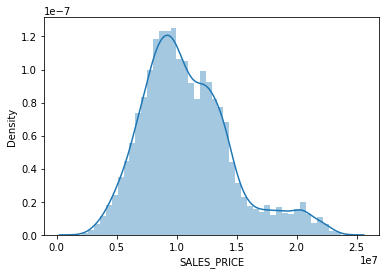

In [20]:
sns.distplot(data["SALES_PRICE"])

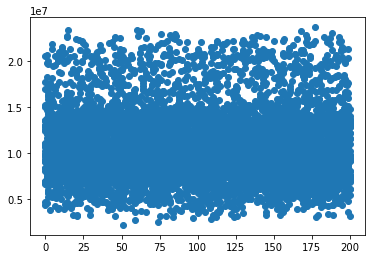

In [21]:
plt.scatter(data["DIST_MAINROAD"],data["SALES_PRICE"])

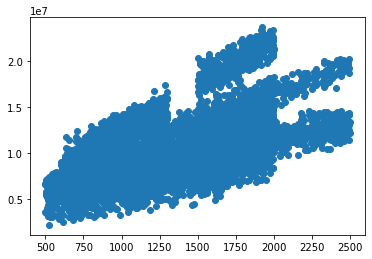

In [22]:
plt.scatter(data["INT_SQFT"],data["SALES_PRICE"])

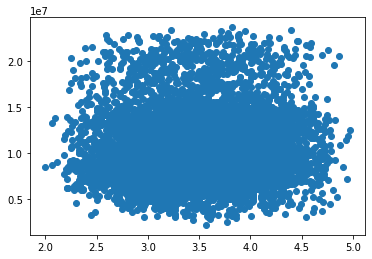

In [23]:
plt.scatter(data["QS_OVERALL"],data["SALES_PRICE"])

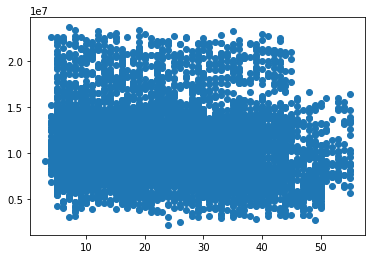

In [24]:
plt.scatter(data["AGE"],data["SALES_PRICE"])

<AxesSubplot:xlabel='AREA'>

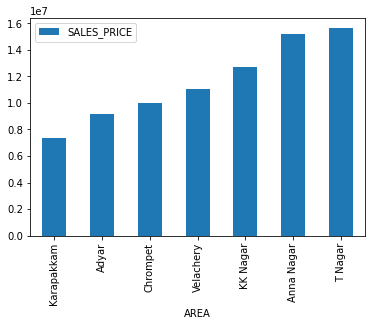

In [25]:
data[["AREA","SALES_PRICE"]].groupby("AREA").mean().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

<AxesSubplot:xlabel='SALE_COND'>

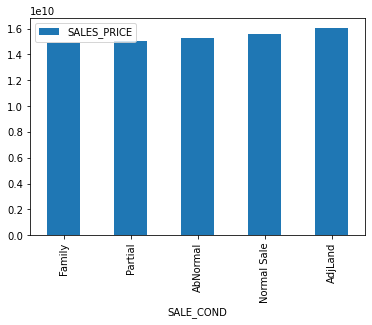

In [26]:
data[["SALE_COND","SALES_PRICE"]].groupby("SALE_COND").sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

<AxesSubplot:xlabel='AREA'>

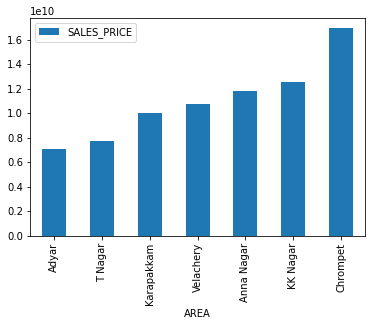

In [27]:
data[["AREA","SALES_PRICE"]].groupby("AREA").sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [28]:
data.drop("DIST_MAINROAD",axis=1,inplace=True)

<AxesSubplot:xlabel='N_BEDROOM'>

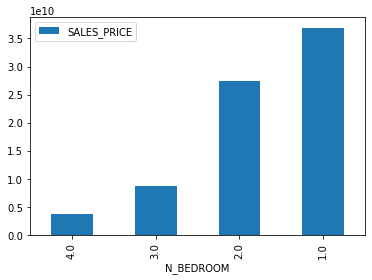

In [29]:
data[["N_BEDROOM","SALES_PRICE"]].groupby("N_BEDROOM").sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

<AxesSubplot:xlabel='N_BATHROOM'>

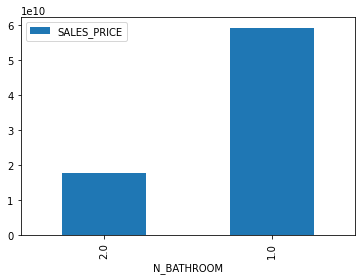

In [30]:
data[["N_BATHROOM","SALES_PRICE"]].groupby("N_BATHROOM").sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

<AxesSubplot:xlabel='N_ROOM'>

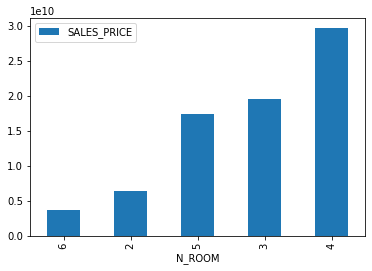

In [31]:
data[["N_ROOM","SALES_PRICE"]].groupby("N_ROOM").sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [32]:
data.drop(["N_BEDROOM","N_BATHROOM"],axis=1,inplace=True)

In [33]:
data.drop(["COMMIS","REG_FEE","PRT_ID"],axis=1,inplace=True)

<AxesSubplot:xlabel='SALE_COND'>

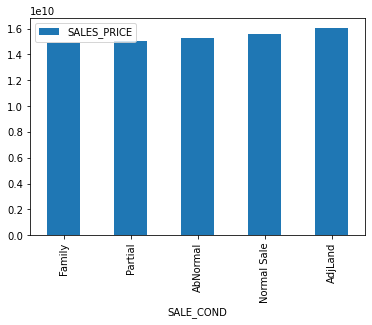

In [34]:
data[["SALE_COND","SALES_PRICE"]].groupby("SALE_COND").sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [35]:
data[["SALE_COND","SALES_PRICE"]].groupby("SALE_COND").sum().sort_values(by=["SALES_PRICE"])

,SALES_PRICE
SALE_COND,
Family,14894893335
Partial,15042839730
AbNormal,15287901540
Normal Sale,15563938915
AdjLand,16036212455


In [36]:
data.drop("SALE_COND",axis=1,inplace=True)

<AxesSubplot:xlabel='BUILDTYPE'>

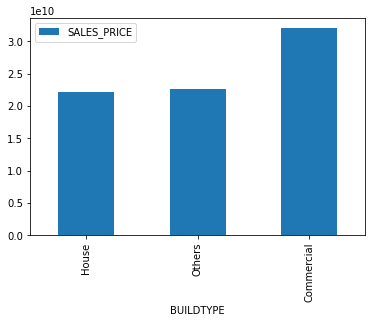

In [37]:
data[["BUILDTYPE","SALES_PRICE"]].groupby("BUILDTYPE").sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [38]:
data[["BUILDTYPE","SALES_PRICE"]].groupby("BUILDTYPE").sum().sort_values(by=["SALES_PRICE"])

,SALES_PRICE
BUILDTYPE,
House,22132076115
Others,22644937550
Commercial,32048772310


<AxesSubplot:xlabel='UTILITY_AVAIL'>

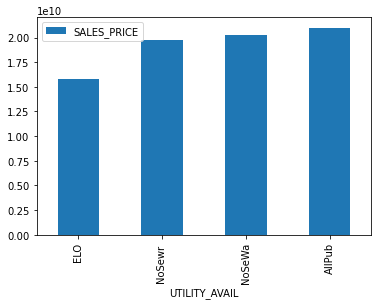

In [39]:
data[["UTILITY_AVAIL","SALES_PRICE"]].groupby("UTILITY_AVAIL").sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [40]:
data[["UTILITY_AVAIL","SALES_PRICE"]].groupby("UTILITY_AVAIL").sum().sort_values(by=["SALES_PRICE"])

,SALES_PRICE
UTILITY_AVAIL,
ELO,15778070195
NoSewr,19780001295
NoSeWa,20258857575
AllPub,21008856910


In [41]:
statistics.variance(data[["UTILITY_AVAIL","SALES_PRICE"]].groupby("UTILITY_AVAIL").sum().sort_values(by=["SALES_PRICE"])["SALES_PRICE"])

5.479660516137324e+18

In [42]:
data.drop("UTILITY_AVAIL",axis=1,inplace=True)

In [43]:
data.drop(["DATE_SALE","DATE_BUILD"],axis=1,inplace=True)

In [44]:
p=data[["PARK_FACIL","SALES_PRICE"]]
print(np.mean(p[p["PARK_FACIL"]=="Yes"]["SALES_PRICE"]))

11437396.82175991


In [45]:
p=data[["PARK_FACIL","SALES_PRICE"]]
print(np.mean(p[p["PARK_FACIL"]=="No"]["SALES_PRICE"]))

10329512.855101457


<AxesSubplot:xlabel='STREET'>

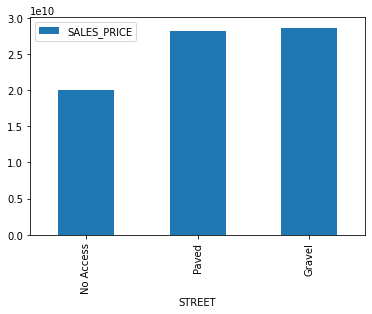

In [46]:
data[["STREET","SALES_PRICE"]].groupby("STREET").sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [47]:
statistics.variance(data[["STREET","SALES_PRICE"]].groupby("STREET").mean()["SALES_PRICE"])

563448288875.645

<AxesSubplot:xlabel='MZZONE'>

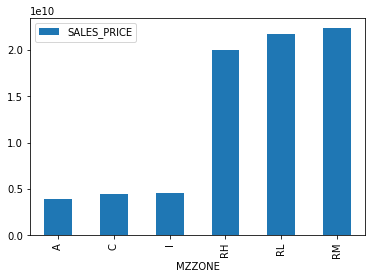

In [48]:
data[["MZZONE","SALES_PRICE"]].groupby("MZZONE").sum().sort_values(by=["SALES_PRICE"]).plot(kind="bar")

In [49]:
data.drop(["QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","AGE"],axis=1,inplace=True)

In [50]:
#Doing encoding
data["AREA"]=data["AREA"].replace({"Chrompet":1,"KK Nagar":2,"Anna Nagar":3,"Velachery":4,"Karapakkam":5,"T Nagar":6,"Adyar":7})

In [51]:
data["PARK_FACIL"]=data["PARK_FACIL"].replace({"Yes":1,"No":0})

In [52]:
data["BUILDTYPE"]=data["BUILDTYPE"].replace({"Commercial":1,"Others":2,"House":3})

In [53]:
data["MZZONE"]=data["MZZONE"].replace({"RM":1,"RL":2,"RH":3,"I":4,"C":5,"A":6})

In [54]:
data["STREET"]=data["STREET"].replace({"Gravel":1,"Paved":2,"No Access":3})

<AxesSubplot:>

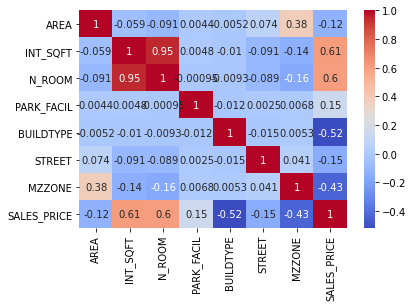

In [55]:
#Checking correlation 
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [56]:
data.corr().sort_values(by="SALES_PRICE")

,AREA,INT_SQFT,N_ROOM,PARK_FACIL,BUILDTYPE,STREET,MZZONE,SALES_PRICE
BUILDTYPE,-0.005231,-0.010219,-0.009284,-0.011584,1.000000,-0.014846,0.005276,-0.515823
MZZONE,0.375669,-0.142489,-0.163375,0.006849,0.005276,0.041087,1.000000,-0.427526
STREET,0.073831,-0.090918,-0.088951,0.002516,-0.014846,1.000000,0.041087,-0.150060
AREA,1.000000,-0.059020,-0.091258,0.004357,-0.005231,0.073831,0.375669,-0.121602
PARK_FACIL,0.004357,0.004771,-0.000948,1.000000,-0.011584,0.002516,0.006849,0.146975
N_ROOM,-0.091258,0.951305,1.000000,-0.000948,-0.009284,-0.088951,-0.163375,0.603417
INT_SQFT,-0.059020,1.000000,0.951305,0.004771,-0.010219,-0.090918,-0.142489,0.612668
SALES_PRICE,-0.121602,0.612668,0.603417,0.146975,-0.515823,-0.150060,-0.427526,1.000000


In [57]:
data.drop(["N_ROOM"],axis=1,inplace=True)

In [58]:
data

,AREA,INT_SQFT,PARK_FACIL,BUILDTYPE,STREET,MZZONE,SALES_PRICE
0,5,1004,1,1,2,6,7600000
1,3,1986,0,1,1,3,21717770
2,7,909,1,1,1,2,13159200
3,4,1855,0,2,2,4,9630290
4,5,1226,1,2,1,5,7406250
...,...,...,...,...,...,...,...
7104,5,598,0,2,3,1,5353000
7105,4,1897,1,2,3,3,10818480
7106,4,1614,0,3,1,4,8351410
7107,5,787,1,1,2,2,8507000


In [59]:
#Going to build model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [60]:
x=data.drop("SALES_PRICE",axis=1)
y=data["SALES_PRICE"]

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [62]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("r2_score :",r2_score(y_test, y_pred))
print("Cross_val_score :",np.mean(cross_val_score(lr,x_train,y_train)))

r2_score : 0.7910390099898763
Cross_val_score : 0.7786058107617873


In [63]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
print("r2_score :",r2_score(y_test, y_pred))
print("Cross_val_score :",np.mean(cross_val_score(tree,x_train,y_train)))

r2_score : 0.9733779325905929
Cross_val_score : 0.9684625946981598


In [64]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("r2_score :",r2_score(y_test, y_pred))
print("Cross_val_score :",np.mean(cross_val_score(xgb,x_train,y_train)))

r2_score : 0.9890255151100238
Cross_val_score : 0.987462901981188


In [65]:
n=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [66]:
n

,Actual,Predicted
3247,9492700,9693248.0
1338,8020500,8359021.0
3059,10105720,9301526.0
1304,20989850,21456768.0
361,11658500,11790223.0
...,...,...
5692,8739135,8506404.0
5267,15195150,14898437.0
5129,10158300,10847742.0
7017,13573320,13817599.0
